In [1]:
import numpy as np
from model import Model
from layers import Linear, Activation
from activator import ReLU, sigmoid
from loss import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
def y(x):
    return 1-3*x[0]+5*x[0]*x[0]-6*np.cos(10*x[0])

n=30
X= np.random.rand(n,1)
noise = np.random.randn(n)
Y= np.array([ [y(X[i])+noise[i]] for i in range(n)])

In [3]:
model = Model(loss=mean_squared_error)
model.add_layer(Linear(8, input_shape=(X.shape[-1],)))
model.add_layer(Activation(sigmoid))
model.add_layer(Linear(8))
model.add_layer(Activation(sigmoid))
model.add_layer(Linear(1))

In [4]:
model

Layers		Output Shape
_____________________________
Linear_0:		(8,)
Activation_1:		(8,)
Linear_2:		(8,)
Activation_3:		(8,)
Linear_4:		(1,)

In [5]:
# To see the loss of each epoch, please set `verbose=True` to turn on verbose mode
model.fit(X, Y, 10000, 0.1, batch_size=30, verbose=False)

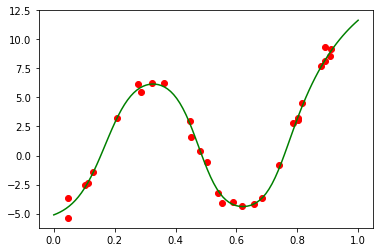

In [6]:
plt.scatter(X, Y, color='r')

dx = np.linspace(0,1, 100)
h_dx = model.predict(dx.reshape(-1, 1))
plt.plot(dx,h_dx,color='green')

plt.show()